## Prepare MOdel on Texting Mining
For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words=set(stopwords.words("english"))

In [2]:
df = pd.read_csv("D:/assingment/Texting Mining/Elon_musk.csv", encoding = 'latin-1')

In [3]:
df

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

## EDA--->Exploratory Data Analysis.....And Cleanig A Data..

In [4]:
df.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 Im an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [5]:
df.tail()

Unnamed: 0                                               Text
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

In [6]:
df.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
df.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [10]:
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [11]:
df

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

## Data Preprocessing

In [12]:
import nltk

In [13]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksri9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=set(stopwords.words("english"))

In [15]:
import string
string.punctuation
import re

In [16]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("Covering")

'cover'

In [17]:
def datapre(text):
    text=text.lower()
    text=re.sub('\[.*?\]', "",text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [18]:
df["Text_Transform1"]=df["Text"].apply(datapre)

In [19]:
df

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                        Text_Transform1  
0                                          im an alien  
1     idaacarmack ray tracing on cyberpunk with hdr ...  
2                      joerogan spotify great interview  
3                                doge is underestimated  
4     teslacn congratulations tesla china for amazin...  
...                                                 ...  
1994  flcnhvy true it sounds so surreal but the nega...  
1995  ppathole make sure to read ur terms amp condit...  
1996                  teslagong ppathole samwise gamgee  
1997                 ppathole altho dumb and dumber is   
1998                            progress update august   

[1999 rows x 2 columns]

In [20]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]#We Cant Assign Directly into text to y we  have to do clonning here.....text=y We cant Do Here.we will clonning like this text=y[:]
    y.clear()
    
    for i in text:
        if i not in  stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return " " .join(y)

In [21]:
df["Text_Transform2"]=df["Text_Transform1"].apply(transform_text)

In [22]:
df

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                        Text_Transform1  \
0                                          im an alien   
1     idaacarmack ray tracing on cyberpunk with hdr ...   
2                      joerogan spotify great interview   
3                                doge is underestimated   
4     teslacn congratulations tesla china for amazin...   
...                                                 ...   
1994  flcnhvy true it sounds so surreal but the nega...   
1995  ppathole make sure to read ur terms amp condit...   
1996                  teslagong ppathole samwise gamgee   
1997                 ppathole altho dumb and dumber is    
1998                            progress update august    

                                        Text_Transform2  
0                                                 alien  
1     idaacarmack ray tracing cyberpunk hdr nextleve...  
2                      joerogan spotify great interview  
3                                   doge underestimated  
4     teslacn congratulations tesla china amazing ex...  
...                                                 ...  
1994  flcnhvy true sounds surreal negative propagand...  
1995  ppathole make sure read ur terms amp condition...  
1996                  teslagong ppathole samwise gamgee  
1997                         ppathole altho dumb dumber  
1998                             progress update august  

[1999 rows x 3 columns]

In [23]:
def transform_text2(text):
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        y.append(ps.stem(i))
        
    return " " .join(y)

In [24]:
df["Text_Transform3"]=df["Text_Transform2"].apply(transform_text2)

In [25]:
df

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                        Text_Transform1  \
0                                          im an alien   
1     idaacarmack ray tracing on cyberpunk with hdr ...   
2                      joerogan spotify great interview   
3                                doge is underestimated   
4     teslacn congratulations tesla china for amazin...   
...                                                 ...   
1994  flcnhvy true it sounds so surreal but the nega...   
1995  ppathole make sure to read ur terms amp condit...   
1996                  teslagong ppathole samwise gamgee   
1997                 ppathole altho dumb and dumber is    
1998                            progress update august    

                                        Text_Transform2  \
0                                                 alien   
1     idaacarmack ray tracing cyberpunk hdr nextleve...   
2                      joerogan spotify great interview   
3                                   doge underestimated   
4     teslacn congratulations tesla china amazing ex...   
...                                                 ...   
1994  flcnhvy true sounds surreal negative propagand...   
1995  ppathole make sure read ur terms amp condition...   
1996                  teslagong ppathole samwise gamgee   
1997                         ppathole altho dumb dumber   
1998                             progress update august   

                                        Text_Transform3  
0                                                 alien  
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  
2                      joerogan spotifi great interview  
3                                       doge underestim  
4     teslacn congratul tesla china amaz execut last...  
...                                                 ...  
1994  flcnhvi true sound surreal neg propaganda stil...  
1995  ppathol make sure read ur term amp condit clic...  
1996                     teslagong ppathol samwis gamge  
1997                          ppathol altho dumb dumber  
1998                              progress updat august  

[1999 rows x 4 columns]

In [26]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
from textblob import TextBlob

In [28]:
def polarity(Text_Transform):
    return TextBlob(Text_Transform).sentiment.polarity

In [29]:
df["polarity"]=df["Text_Transform3"].apply(polarity)

In [30]:
df

Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                        Text_Transform1  \
0                                          im an alien   
1     idaacarmack ray tracing on cyberpunk with hdr ...   
2                      joerogan spotify great interview   
3                                doge is underestimated   
4     teslacn congratulations tesla china for amazin...   
...                                                 ...   
1994  flcnhvy true it sounds so surreal but the nega...   
1995  ppathole make sure to read ur terms amp condit...   
1996                  teslagong ppathole samwise gamgee   
1997                 ppathole altho dumb and dumber is    
1998                            progress update august    

                                        Text_Transform2  \
0                                                 alien   
1     idaacarmack ray tracing cyberpunk hdr nextleve...   
2                      joerogan spotify great interview   
3                                   doge underestimated   
4     teslacn congratulations tesla china amazing ex...   
...                                                 ...   
1994  flcnhvy true sounds surreal negative propagand...   
1995  ppathole make sure read ur terms amp condition...   
1996                  teslagong ppathole samwise gamgee   
1997                         ppathole altho dumb dumber   
1998                             progress update august   

                                        Text_Transform3  polarity  
0                                                 alien -0.250000  
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  0.000000  
2                      joerogan spotifi great interview  0.800000  
3                                       doge underestim  0.000000  
4     teslacn congratul tesla china amaz execut last...  0.000000  
...                                                 ...       ...  
1994  flcnhvi true sound surreal neg propaganda stil...  0.186667  
1995  ppathol make sure read ur term amp condit clic...  0.500000  
1996                     teslagong ppathol samwis gamge  0.000000  
1997                          ppathol altho dumb dumber -0.375000  
1998                              progress updat august  0.000000  

[1999 rows x 5 columns]

In [31]:
df1=df.drop(df.columns[[0,1,2]],axis=1)

In [32]:
df1

Text_Transform3  polarity
0                                                 alien -0.250000
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  0.000000
2                      joerogan spotifi great interview  0.800000
3                                       doge underestim  0.000000
4     teslacn congratul tesla china amaz execut last...  0.000000
...                                                 ...       ...
1994  flcnhvi true sound surreal neg propaganda stil...  0.186667
1995  ppathol make sure read ur term amp condit clic...  0.500000
1996                     teslagong ppathol samwis gamge  0.000000
1997                          ppathol altho dumb dumber -0.375000
1998                              progress updat august  0.000000

[1999 rows x 2 columns]

In [33]:
def sentiment(m):
    if m<0:
        return "negative"
    elif m>0:
        return "positive"
    else:
        return "nutral"

In [34]:
df1["sentiment"]=df1["polarity"].apply(sentiment)

In [35]:
df1

Text_Transform3  polarity sentiment
0                                                 alien -0.250000  negative
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  0.000000    nutral
2                      joerogan spotifi great interview  0.800000  positive
3                                       doge underestim  0.000000    nutral
4     teslacn congratul tesla china amaz execut last...  0.000000    nutral
...                                                 ...       ...       ...
1994  flcnhvi true sound surreal neg propaganda stil...  0.186667  positive
1995  ppathol make sure read ur term amp condit clic...  0.500000  positive
1996                     teslagong ppathol samwis gamge  0.000000    nutral
1997                          ppathol altho dumb dumber -0.375000  negative
1998                              progress updat august  0.000000    nutral

[1999 rows x 3 columns]

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='sentiment', ylabel='count'>

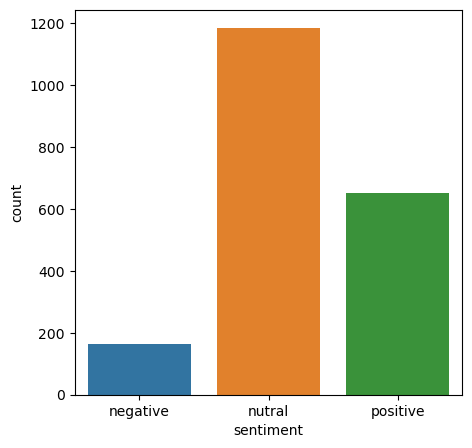

In [37]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x="sentiment",data=df1)

Text(0.5, 1.0, 'Distribution Of Sentiments')

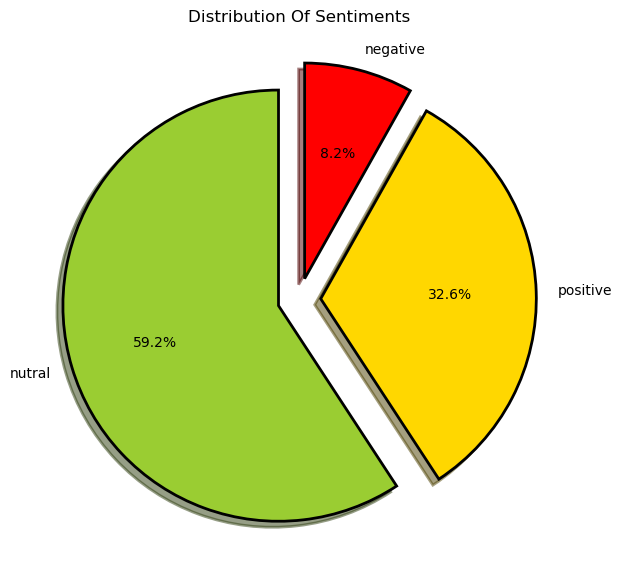

In [38]:
fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={"linewidth":2,"edgecolor":"black"}
tags=df1["sentiment"].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title("Distribution Of Sentiments")

In [39]:
df1

Text_Transform3  polarity sentiment
0                                                 alien -0.250000  negative
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  0.000000    nutral
2                      joerogan spotifi great interview  0.800000  positive
3                                       doge underestim  0.000000    nutral
4     teslacn congratul tesla china amaz execut last...  0.000000    nutral
...                                                 ...       ...       ...
1994  flcnhvi true sound surreal neg propaganda stil...  0.186667  positive
1995  ppathol make sure read ur term amp condit clic...  0.500000  positive
1996                     teslagong ppathol samwis gamge  0.000000    nutral
1997                          ppathol altho dumb dumber -0.375000  negative
1998                              progress updat august  0.000000    nutral

[1999 rows x 3 columns]

In [40]:
from wordcloud import WordCloud
wc=WordCloud(width=1600,height=500,min_font_size=10,background_color="black")

In [41]:
positive_tweets=wc.generate(df1[df1['sentiment']=="positive"]["Text_Transform3"].str.cat(sep=" "))
positive_tweets

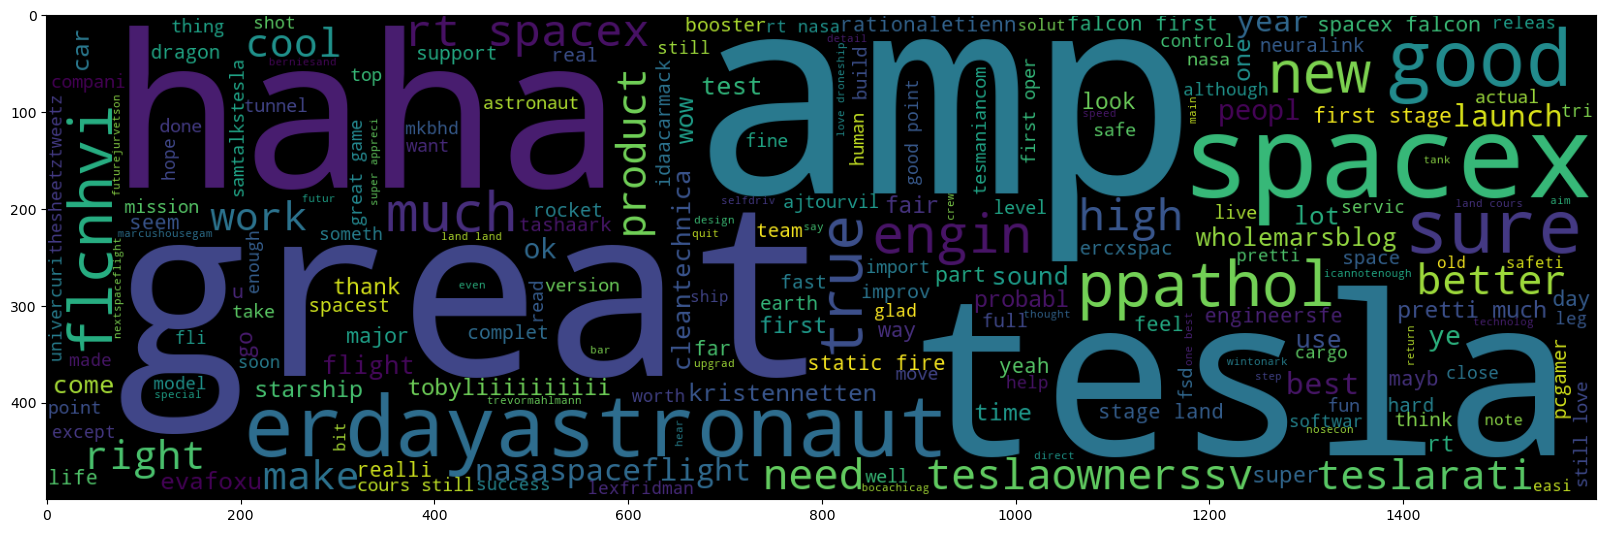

In [42]:
plt.figure(figsize=(20,15))
plt.imshow(positive_tweets)

In [43]:
negative_tweets=wc.generate(df1[df1['sentiment']=="negative"]["Text_Transform3"].str.cat(sep=" "))
negative_tweets

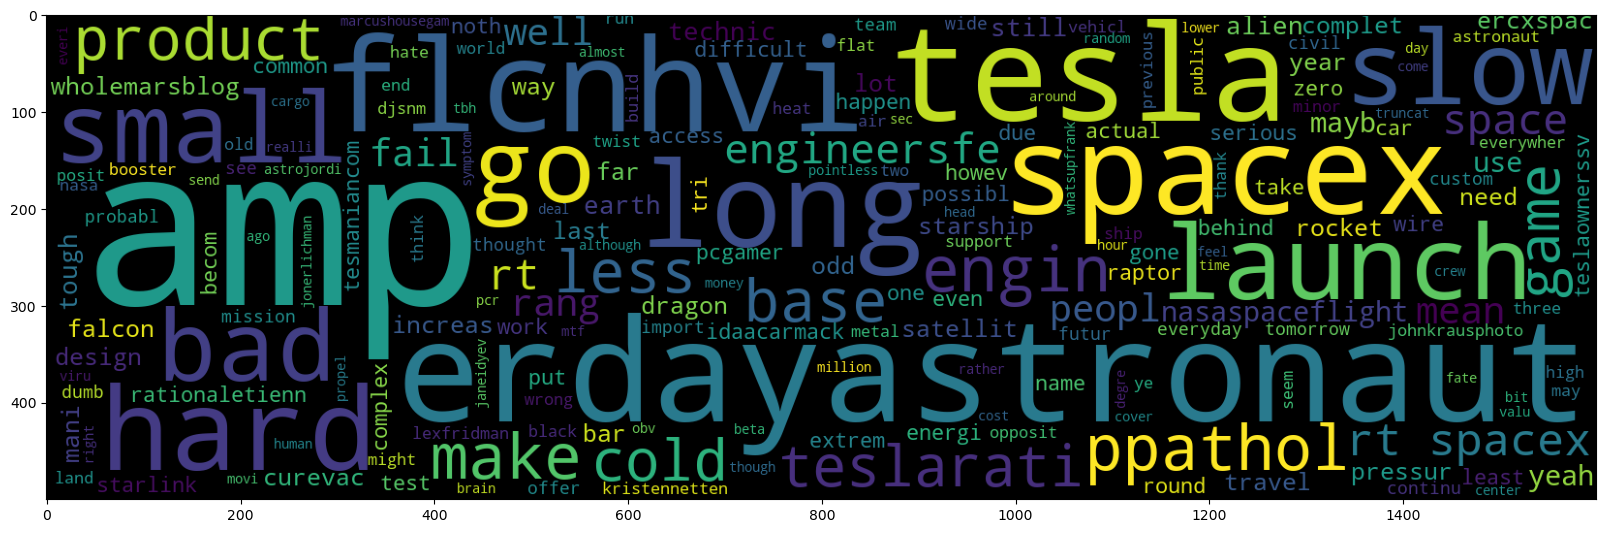

In [44]:
plt.figure(figsize=(20,15))
plt.imshow(positive_tweets)

In [45]:
neutral_tweets=wc.generate(df1[df1['sentiment']=="nutral"]["Text_Transform3"].str.cat(sep=" "))
neutral_tweets

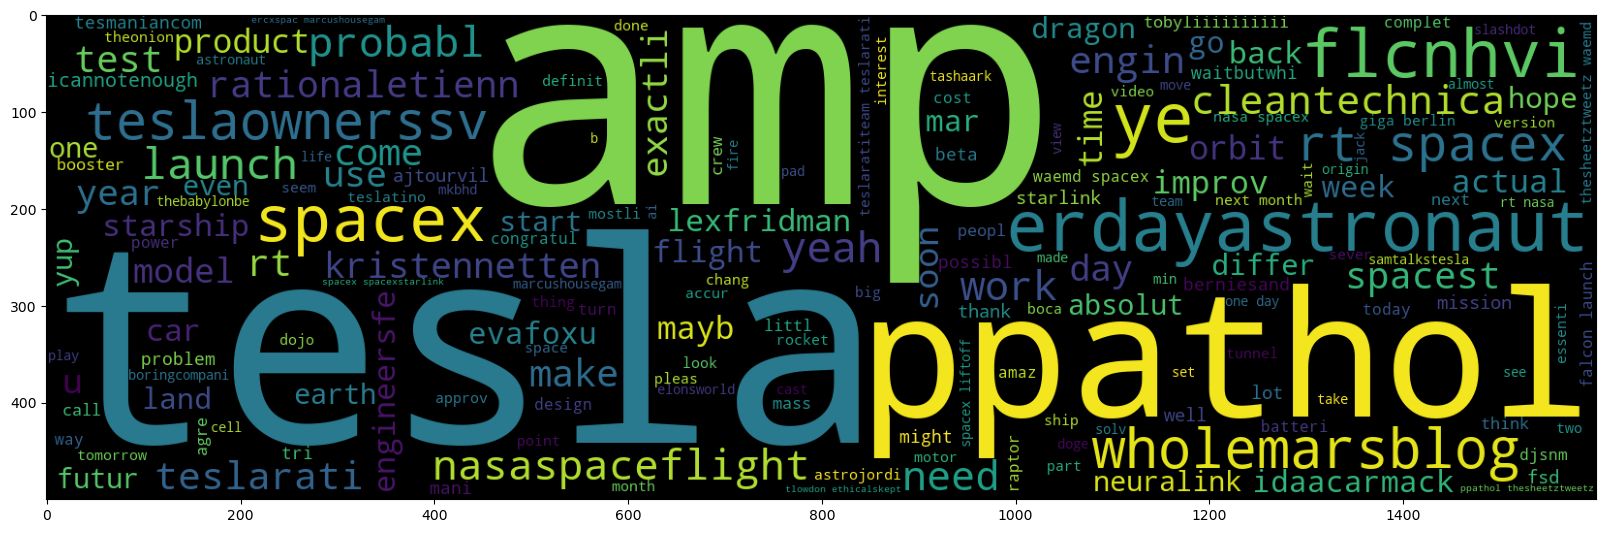

In [46]:
plt.figure(figsize=(20,15))
plt.imshow(positive_tweets)

In [47]:
## This iS For Positive Tweets...

Po_tweets=[]
for msg in df1[df1["sentiment"]=="positive"]["Text_Transform3"].tolist():
    for word in msg.split():
        Po_tweets.append(word)

In [48]:
len(Po_tweets)

5066

In [49]:
## This iS For Negative Tweets Tweets...

Ne_tweets=[]
for msg in df1[df1["sentiment"]=="negative"]["Text_Transform3"].tolist():
    for word in msg.split():
        Ne_tweets.append(word)


In [50]:
len(Ne_tweets)

1467

In [51]:
## This iS For Neutral Tweets Tweets...

Neu_tweets=[]
for msg in df1[df1["sentiment"]=="nutral"]["Text_Transform3"].tolist():
    for word in msg.split():
        Neu_tweets.append(word)


In [52]:
len(Neu_tweets)

6511

## Model Building......

In [53]:
df1

Text_Transform3  polarity sentiment
0                                                 alien -0.250000  negative
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  0.000000    nutral
2                      joerogan spotifi great interview  0.800000  positive
3                                       doge underestim  0.000000    nutral
4     teslacn congratul tesla china amaz execut last...  0.000000    nutral
...                                                 ...       ...       ...
1994  flcnhvi true sound surreal neg propaganda stil...  0.186667  positive
1995  ppathol make sure read ur term amp condit clic...  0.500000  positive
1996                     teslagong ppathol samwis gamge  0.000000    nutral
1997                          ppathol altho dumb dumber -0.375000  negative
1998                              progress updat august  0.000000    nutral

[1999 rows x 3 columns]

In [54]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df1["sentiment"]=LE.fit_transform(df1["sentiment"])

In [55]:
df1

Text_Transform3  polarity  sentiment
0                                                 alien -0.250000          0
1     idaacarmack ray trace cyberpunk hdr nextlevel tri  0.000000          1
2                      joerogan spotifi great interview  0.800000          2
3                                       doge underestim  0.000000          1
4     teslacn congratul tesla china amaz execut last...  0.000000          1
...                                                 ...       ...        ...
1994  flcnhvi true sound surreal neg propaganda stil...  0.186667          2
1995  ppathol make sure read ur term amp condit clic...  0.500000          2
1996                     teslagong ppathol samwis gamge  0.000000          1
1997                          ppathol altho dumb dumber -0.375000          0
1998                              progress updat august  0.000000          1

[1999 rows x 3 columns]

<AxesSubplot:>

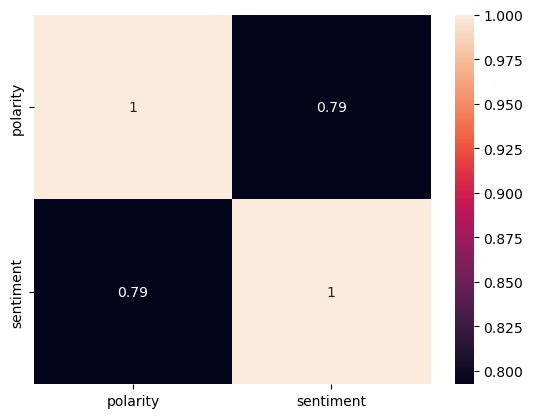

In [56]:
sns.heatmap(df1.corr(),annot=True)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [58]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df1["Text_Transform3"]).toarray()

In [59]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
X.shape

(1999, 3706)

In [61]:
Y=df1["sentiment"]

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [63]:
print("Size of X_train",(X_train.shape))
print("Size of X_test",(X_test.shape))
print("Size of Y_train",(Y_train.shape))
print("Size of Y_test",(Y_test.shape))

Size of X_train (1599, 3706)
Size of X_test (400, 3706)
Size of Y_train (1599,)
Size of Y_test (400,)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
LR=LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [65]:
Y_pred=LR.predict(X_test)
LR_Accuracy_test=accuracy_score(Y_pred,Y_test)
print("Accuracy Score of Test",LR_Accuracy_test.round(2))

Accuracy Score of Test 0.78


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [73]:
clf = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [69]:
def result(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,y_pred)
    return accuracy

In [70]:
result(etc,X_train,Y_train,X_test,Y_test)

0.9275

In [71]:
accuracy_scores = []

for name,clf in clf.items():
    current_accuracy= result(clf, X_train,Y_train,X_test,Y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    accuracy_scores.append(current_accuracy)

For  SVC
Accuracy -  0.8275
For  KN
Accuracy -  0.585
For  NB
Accuracy -  0.7525
For  DT
Accuracy -  0.6975
For  LR
Accuracy -  0.785
For  RF
Accuracy -  0.905
For  AdaBoost
Accuracy -  0.8925
For  BgC
Accuracy -  0.9175
For  ETC
Accuracy -  0.9275
For  GBDT
Accuracy -  0.8325


In [74]:
performance_df=pd.DataFrame({"Algorithem":clf.keys() ,"Accuracy_Score":accuracy_scores})


In [75]:
performance_df

Algorithem  Accuracy_Score
0        SVC          0.8275
1         KN          0.5850
2         NB          0.7525
3         DT          0.6975
4         LR          0.7850
5         RF          0.9050
6   AdaBoost          0.8925
7        BgC          0.9175
8        ETC          0.9275
9       GBDT          0.8325

In [76]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithem")
performance_df1

Algorithem        variable   value
0        SVC  Accuracy_Score  0.8275
1         KN  Accuracy_Score  0.5850
2         NB  Accuracy_Score  0.7525
3         DT  Accuracy_Score  0.6975
4         LR  Accuracy_Score  0.7850
5         RF  Accuracy_Score  0.9050
6   AdaBoost  Accuracy_Score  0.8925
7        BgC  Accuracy_Score  0.9175
8        ETC  Accuracy_Score  0.9275
9       GBDT  Accuracy_Score  0.8325

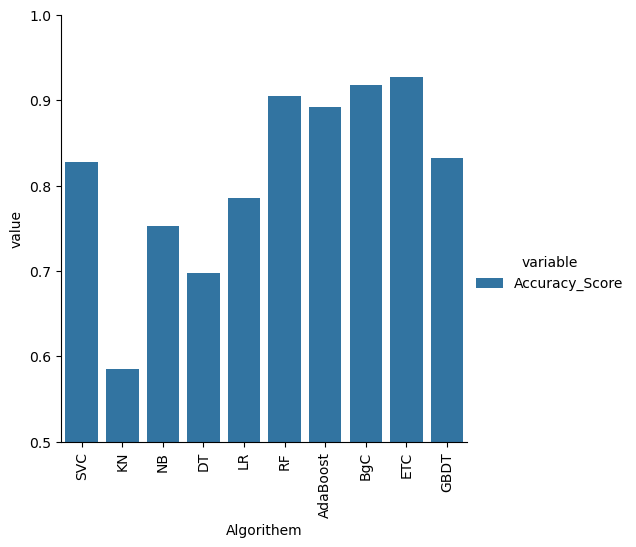

In [77]:
sns.catplot(x = 'Algorithem', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
! pip install future


Defaulting to user installation because normal site-packages is not writeable


In [79]:
import codecs
import re
import copy
import collections
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib
    
%matplotlib inline

In [80]:
with codecs.open("D:/assingment/Texting Mining/positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [83]:
with codecs.open("D:/assingment/Texting Mining/negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [84]:
with codecs.open("D:/assingment/Texting Mining/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

## This is for extracting data from Amozon reviews

In [85]:
pip install bs4

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=716ca0ecd50a2f0b2caa80ff019ac6fda25a9705f5f7e4045ef88588111ed020
  Stored in directory: c:\users\ksri9\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [87]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests

In [88]:
! pip install autoscraper

Defaulting to user installation because normal site-packages is not writeable


In [89]:
from autoscraper import AutoScraper

In [90]:
!pip install selenium 
!pip install msedge-selenium-tools selenium==3.141

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 6.5/6.5 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 384.9/384.9 kB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB ? eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 904.6/904.6 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: selenium
    Found existing installation: selenium 4.9.0
    Uninstalling selenium-4.9.0:
      Successfully uninstalled selenium-4.9.0


In [93]:
from bs4 import BeautifulSoup 

In [94]:
import csv

In [95]:
from selenium import webdriver

In [96]:
from msedge.selenium_tools import Edge,EdgeOptions

In [97]:
pip install webdriver-manager

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [98]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.80M/6.80M [00:00<00:00, 7.59MB/s]


In [99]:
def get_url(search_term):
    """Gernerate a Url from search Term"""
    template="https://www.amazon.com/s?k={}&crid=1LBHFB739NH7Z&sprefix=ultrawidemonitor%2Caps%2C327&ref=nb_sb_noss_2"
    search_term=search_term.replace(" ",'+')
    return template.format(search_term)

In [100]:
url=get_url('monitor')
print(url)

https://www.amazon.com/s?k=monitor&crid=1LBHFB739NH7Z&sprefix=ultrawidemonitor%2Caps%2C327&ref=nb_sb_noss_2


In [101]:
driver.get(url)

## Extract collection

In [103]:
soup=BeautifulSoup(driver.page_source,'html.parser')

In [104]:
result=soup.find_all('div',{'data-component-type': 's-search-result'})

In [105]:
len(result)

22

## prototype the Extract The single result

In [106]:
item=result[0]

In [107]:
atag=item.h2.a

In [108]:
description = atag.text.strip()

In [109]:
url="https://www.amazon.com"+atag.get('href')

In [110]:
price_parent=item.find("span","a-price")
price=price_parent.find('span',"a-offscreen").text

In [111]:
rating=item.i.text
review_count=item.find('span',{"class":"a-size-base s-underline-text"}).text

## Generalized the Function

In [112]:
def extract_record(item):
    """ Extracr and Record the Data from single record"""
    #description and URl
    atag=item.h2.a
    description=atag.text.strip()
    url="https://www.amazon.com"+atag.get('href')
    ### Price
    price_parent=item.find("span","a-price")
    price=price_parent.find('span',"a-offscreen").text
    ##rank And Rating
    rating=item.i.text
    review_count=item.find('span',{"class":"a-size-base s-underline-text"}).text
    results=(description,price,rating,review_count,url)
    return results

In [113]:
record=[]
result=soup.find_all('div',{'data-component-type': 's-search-result'})
for item in result:
    record.append(extract_record(item))

AttributeError: 'NoneType' object has no attribute 'find'

## Error Handling

In [114]:
def extract_record(item):
    """ Extracr and Record the Data from single record"""
    #description and URl
    atag=item.h2.a
    description=atag.text.strip()
    url="https://www.amazon.com"+atag.get('href')
    ### Price
    try:
        price_parent=item.find("span","a-price")
        price=price_parent.find('span',"a-offscreen").text
    except AttributeError:
        return
    ##rank And Rating
    try:
        rating=item.i.text
        review_count=item.find('span',{"class":"a-size-base s-underline-text"}).text
    except AttributeError:
        rating=''
        review_count=''
    results=(description,price,rating,review_count,url)
    return results

In [115]:
records=[]
result=soup.find_all('div',{'data-component-type': 's-search-result'})
for item in result:
    record=extract_record(item)
    if record:
        records.append(record)

In [116]:
records[0]

('CRUA 24" Curved Monitor, FHD(1920×1080p) 2800R 75HZ, 99% sRGB Color Gamut Computer Monitors, 3-Sided Narrow Bezel and Filter Blue Light Function, Desktop PC Monitor(HDMI, VGA)- Machine Black',
 '$94.99',
 '4.4 out of 5 stars',
 '2,266',
 'https://www.amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A00057822BSULI68Z8XSJ&qualifier=1683011182&id=5647791441595553&widgetName=sp_atf&url=%2FCRUA-1920%25C3%25971080p-Ultrawide-Monitors-Function%2Fdp%2FB0B17J144M%2Fref%3Dsr_1_1_sspa%3Fcrid%3D1LBHFB739NH7Z%26keywords%3Dmonitor%26qid%3D1683011182%26sprefix%3Dultrawidemonitor%252Caps%252C327%26sr%3D8-1-spons%26psc%3D1')

In [117]:
for rows in records:
    print(rows[1])


$94.99
$179.99
$99.50
$89.99
$99.99
$69.99
$79.40
$79.40
$99.99
$89.93
$119.99
$188.99
$94.99
$123.90
$119.99
$139.82
$199.99
$75.98
$279.99
$129.00
$76.99


## Getting The Next Page......Navigate the next Page

In [118]:
def get_url(search_term):
    """Gernerate a Url from search Term"""
    template="https://www.amazon.com/s?k={}&crid=1LBHFB739NH7Z&sprefix=ultrawidemonitor%2Caps%2C327&ref=nb_sb_noss_2"
    search_term=search_term.replace(" ",'+')
    
    
    ## Add Term Querry to url
    url=template.format(search_term)
    ##Add page Querry To placeholder
    url +='&page{}'
    return url

## Putting it All Together

In [120]:
from bs4 import BeautifulSoup 
import csv
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
def get_url(search_term):
    """Gernerate a Url from search Term"""
    template="https://www.amazon.com/s?k={}&crid=1LBHFB739NH7Z&sprefix=ultrawidemonitor%2Caps%2C327&ref=nb_sb_noss_2"
    search_term=search_term.replace(" ",'+')
    
    
    ## Add Term Querry to url
    url=template.format(search_term)
    ##Add page Querry To placeholder
    url +='&page{}'
    return url
def extract_record(item):
    """ Extracr and Record the Data from single record"""
    #description and URl
    atag=item.h2.a
    description=atag.text.strip()
    url="https://www.amazon.com"+atag.get('href')
    ### Price
    try:
        price_parent=item.find("span","a-price")
        price=price_parent.find('span',"a-offscreen").text
    except AttributeError:
        return
    ##rank And Rating
    try:
        rating=item.i.text
        review_count=item.find('span',{"class":"a-size-base s-underline-text"}).text
    except AttributeError:
        rating=''
        review_count=''
    results=(description,price,rating,review_count,url)
    return results
def main(search_term):
    """Run Main programm Routine"""
    #Startup the webdriver
    driver = webdriver.Chrome(ChromeDriverManager().install())
    record=[]
    url=get_url(search_term)
    for page in range(1,21):
        driver.get(url.format(page))
        soup=BeautifulSoup(driver.page_source,'html.parser')
        result=soup.find_all('div',{'data-component-type': 's-search-result'})
        
        for item in result:
            records=extract_record(item)
            if records:
                record.append(records)
    driver.close()
    
    ## Save Record in csv Format
    with open('results_mobile.csv','w',newline='',encoding='utf-8') as f:
        writer=csv.writer(f)
        writer.writerow(['Description','price','Rating','ReviewCount','Url'])
        writer.writerows(record)

In [121]:
main("mobile")

In [122]:
import pandas as pd

In [124]:
df=pd.read_csv("D:/assingment/Texting Mining/results_mobile.csv")

In [125]:
df

Description    price  \
0     SAMSUNG Galaxy A14 5G A Series Cell Phone, Fac...  $199.99   
1     Tiny Love Take Along Mobile Magical Tales, Bla...   $29.99   
2     SAMSUNG Galaxy S23+ Plus Cell Phone, Factory U...  $849.99   
3     Baby Mobile for Crib Crib Nursery Mobile for B...   $24.99   
4     The Peanutshell Safari Animals Musical Crib Mo...   $39.99   
...                                                 ...      ...   
1155  Eners Baby Crib Mobile with Music and Lights, ...   $32.99   
1156  HLEEDUO Baby Musical Mobile with Rotating Hook...   $12.98   
1157  Mobil 1 Full Synthetic LV Automatic Transmissi...   $52.00   
1158  RV Designer S811, Self Contained Dual Outlet w...   $10.42   
1159  SIMO Solis Lite 4G LTE WiFi Mobile Hotspot, Lo...  $139.99   

                  Rating ReviewCount  \
0     4.0 out of 5 stars         145   
1     4.4 out of 5 stars      14,173   
2     4.7 out of 5 stars          31   
3     4.4 out of 5 stars          49   
4     4.5 out of 5 stars       1,159   
...                  ...         ...   
1155  4.2 out of 5 stars          43   
1156  3.9 out of 5 stars          79   
1157  4.8 out of 5 stars         353   
1158  4.6 out of 5 stars         965   
1159  4.4 out of 5 stars         278   

                                                    Url  
0     https://www.amazon.com/gp/slredirect/picassoRe...  
1     https://www.amazon.com/Tiny-Love-Along-Mobile-...  
2     https://www.amazon.com/SAMSUNG-Factory-Unlocke...  
3     https://www.amazon.com/Mobile-Nursery-Bedroom-...  
4     https://www.amazon.com/Peanutshell-Animals-Mus...  
...                                                 ...  
1155  https://www.amazon.com/Mobile-Lights-Control-R...  
1156  https://www.amazon.com/HLEEDUO-Rotating-Soothi...  
1157  https://www.amazon.com/ExxonMobil-Mobil-Synthe...  
1158  https://www.amazon.com/RV-Designer-S811-Contai...  
1159  https://www.amazon.com/Hotspot-Coverage-Connec...  

[1160 rows x 5 columns]

In [126]:
df.drop(df.columns[[4]],axis=1,inplace=True)

In [127]:
df

Description    price  \
0     SAMSUNG Galaxy A14 5G A Series Cell Phone, Fac...  $199.99   
1     Tiny Love Take Along Mobile Magical Tales, Bla...   $29.99   
2     SAMSUNG Galaxy S23+ Plus Cell Phone, Factory U...  $849.99   
3     Baby Mobile for Crib Crib Nursery Mobile for B...   $24.99   
4     The Peanutshell Safari Animals Musical Crib Mo...   $39.99   
...                                                 ...      ...   
1155  Eners Baby Crib Mobile with Music and Lights, ...   $32.99   
1156  HLEEDUO Baby Musical Mobile with Rotating Hook...   $12.98   
1157  Mobil 1 Full Synthetic LV Automatic Transmissi...   $52.00   
1158  RV Designer S811, Self Contained Dual Outlet w...   $10.42   
1159  SIMO Solis Lite 4G LTE WiFi Mobile Hotspot, Lo...  $139.99   

                  Rating ReviewCount  
0     4.0 out of 5 stars         145  
1     4.4 out of 5 stars      14,173  
2     4.7 out of 5 stars          31  
3     4.4 out of 5 stars          49  
4     4.5 out of 5 stars       1,159  
...                  ...         ...  
1155  4.2 out of 5 stars          43  
1156  3.9 out of 5 stars          79  
1157  4.8 out of 5 stars         353  
1158  4.6 out of 5 stars         965  
1159  4.4 out of 5 stars         278  

[1160 rows x 4 columns]

## Now We will Extract The Review Of any Product in Amazon Sites.........................

In [128]:
import pandas as pd
import requests
import csv
from bs4 import BeautifulSoup 
import random

search_query="nike+shoes+men" 

In [129]:
base_url="https://www.amazon.com/s?k="

In [130]:
url=base_url+search_query
url

'https://www.amazon.com/s?k=nike+shoes+men'

In [131]:
header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36','referer':'https://www.amazon.com/s?k=nike+shoes+men&crid=28WRS5SFLWWZ6&sprefix=nike%2Caps%2C357&ref=nb_sb_ss_organic-diversity_2_4'}

search_response=requests.get(url,headers=header)

print(search_response.status_code)

print(search_response.text)

print(search_response.cookies)

200
<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->

<script type='text/javascript'>var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'>
<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">
<link rel="dns-prefetch" href="https://m.media-amazon.com">
<link rel="dns-prefetch" href="https://completion.amazon.com">
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type='text/javascript'>
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [132]:
def getAmazonSearch(search_query):
    url="https://www.amazon.com/s?k="+search_query
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

## function to get the contents of individual product pages using 'data-asin' number (unique identification number)

In [133]:
def Searchasin(asin):
    url="https://www.amazon.com/dp/"+asin
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [134]:
# ## function to pass on the link of 'see all reviews' and extract the content
def Searchreviews(review_link):
    url="https://www.amazon.com"+review_link
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [135]:
# ## First page product reviews extraction

# In[50]:
product_names=[]
response=getAmazonSearch('nike+shoes+men')
soup=BeautifulSoup(response.content)
for i in soup.findAll("span",{'class':'a-size-base-plus a-color-base a-text-normal'}): # the tag which is common for all the names of products
    product_names.append(i.text) #adding the product names to the list

https://www.amazon.com/s?k=nike+shoes+men


In [136]:
product_names

['MEHOTO Mens Air Running Sneakers, Men Sport Fitness Gym Jogging Walking Lightweight Shoes, Size 7-12.5',
 'Nike Mens Free Rn 2018 Running Shoe',
 "Nike Men's Air Monarch IV Cross Trainer",
 "Nike Men's Sport Trail Running Shoe",
 "Nike Men's Ebernon Low Basketball Shoe",
 'Nike Mens Air Max 90 G NRG Running Shoes',
 "Nike Air Max 2021 Men's Shoes",
 "Nike Dunk High Retro Men's Shoes",
 "Nike Air Max 90 SE Men's Shoes",
 "Nike Men's Running Shoe",
 "Nike Men's Sneaker,Running Shoes",
 "Nike Men's Court Vision Low Sneaker",
 'Nike Legend Essential 2 Mens',
 "Nike Men's Air Force 1 '07 An20 Basketball Shoe",
 "Nike Men's Gymnastics Shoes",
 "Nike Men's Flex Control Tr4 Cross Trainer",
 "Nike Men's Basketball Shoes",
 'AHUSIR Mens Air Running Shoes Breathable Athletic Walking Tennis Sneakers for Sports Gym (US6.5-12)',
 "Nike Men's Air Monarch Iv Cross Trainer",
 "NIKE Men's Tanjun Sneakers, Breathable Textile Uppers and Comfortable Lightweight Cushioning",
 'Nike Lebron Witness 6 Black/

In [137]:
len(product_names)

76

In [138]:
data_asin=[]
response=getAmazonSearch('nike+shoes+men')
soup=BeautifulSoup(response.content)
for i in soup.findAll("div",{'class':"sg-col-4-of-24 sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 AdHolder sg-col s-widget-spacing-small sg-col-4-of-20"}):
    data_asin.append(i['data-asin'])

https://www.amazon.com/s?k=nike+shoes+men


In [139]:
response.status_code


200

In [141]:
data_asin

['B07GBKVD52',
 'B0BNMYWCQG',
 'B07SQQ4GW5',
 'B08MPRM77Q',
 'B089R3VBQW',
 'B092HHTJ8P',
 'B09PHJTQNX',
 'B0BPKSFZHJ',
 'B0BJV7BQKK',
 'B0BP26GK4X',
 'B09494VKV5',
 'B09YBK41Q6']

In [142]:
len(data_asin)

12

In [143]:
# #By passing the data-asin numbers, we can extract the 'see all reviews' link for each product in the page
link=[]
for i in range(len(data_asin)):
    response=Searchasin(data_asin[i])
    soup=BeautifulSoup(response.content)
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])

https://www.amazon.com/dp/B07GBKVD52
https://www.amazon.com/dp/B0BNMYWCQG
https://www.amazon.com/dp/B07SQQ4GW5
https://www.amazon.com/dp/B08MPRM77Q
https://www.amazon.com/dp/B089R3VBQW
https://www.amazon.com/dp/B092HHTJ8P
https://www.amazon.com/dp/B09PHJTQNX
https://www.amazon.com/dp/B0BPKSFZHJ
https://www.amazon.com/dp/B0BJV7BQKK
https://www.amazon.com/dp/B0BP26GK4X
https://www.amazon.com/dp/B09494VKV5
https://www.amazon.com/dp/B09YBK41Q6


In [144]:
print(len(link))

# #### Now we have the 'see all review' links. Using this link along with a page number, we can extract the reviews in any number of pages for all the products
link

17


['/MEHOTO-Fashion-Lightweight-Walking-Sneakers/product-reviews/B0874SJGZG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/AHUSIR-Breathable-Athletic-Sneakers-US6-5-12/product-reviews/B0BNMZZ44S/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Wonesion-Breathable-Walking-Running-Sneakers/product-reviews/B07WZGQ7CM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Wonesion-Breathable-Walking-Running-Sneakers/product-reviews/B07WZGQ7CM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Autper-Athletic-Lightweight-Sneakers-6-5-US12-5/product-reviews/B0BBTFPJB3/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Autper-Athletic-Lightweight-Sneakers-6-5-US12-5/product-reviews/B0BBTFPJB3/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/MAGPER-Running-Athletic-Jogging-Sneakers/product-reviews/B08Y6P9DCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/MAGPER-Running-Athletic-Joggin

In [145]:
reviews=[]
for j in range(len(link)):
    for k in range(4):
        response=Searchreviews(link[j]+'&pageNumber='+str(k))
        soup=BeautifulSoup(response.content)
        for i in soup.findAll("span",{'data-hook':"review-body"}):
            reviews.append(i.text)


https://www.amazon.com/MEHOTO-Fashion-Lightweight-Walking-Sneakers/product-reviews/B0874SJGZG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/MEHOTO-Fashion-Lightweight-Walking-Sneakers/product-reviews/B0874SJGZG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/MEHOTO-Fashion-Lightweight-Walking-Sneakers/product-reviews/B0874SJGZG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/MEHOTO-Fashion-Lightweight-Walking-Sneakers/product-reviews/B0874SJGZG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/AHUSIR-Breathable-Athletic-Sneakers-US6-5-12/product-reviews/B0BNMZZ44S/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/AHUSIR-Breathable-Athletic-Sneakers-US6-5-12/product-reviews/B0BNMZZ44S/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pag

In [146]:
len(reviews)

170

In [147]:
rev={'reviews':reviews}

In [148]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [149]:
review_data

reviews
0        \nShoe feels tight too narrow only worn 2x since purchased should return for larger size but will just keep it\n
1                                 \nThey run a little big! Bought a 10 1/2 would recommend getting a half size smaller.\n
2                                                                                           \nPleased with my purchase.\n
3                                                                                                                \nnone\n
4                                                        \nNot as I wxoected look wise very nice. But tad bit too loose\n
..                                                                                                                    ...
165  \nGostei demais do produto. Realmente de excelente qualidade pelo valor. Muito confortável e bonito, vale a pena!!\n
166                                                                                                               \nSim\n
167                                       \nEle não é tão bom quanto pensava, poucos meses de uso e já está desgastado.\n
168                                           \nSo elogios, serviu direitinho,muito confortável, muito rapido  entrega.\n
169                  \nO Tênis veio como descrito, e é muito bonito e confortável ,recomendo e comprarei outras vezes!!\n

[170 rows x 1 columns]

## Sentimental Analysis of Amazon Review........
## EDA--->Exploratory Data Analysis.....And Cleanig A Data..

In [151]:
review_data.isnull().sum()

reviews    0
dtype: int64

In [152]:
review_data.duplicated().sum()

51

In [153]:
review_data1 = review_data.drop_duplicates(keep= 'first')

In [154]:
review_data1

reviews
0        \nShoe feels tight too narrow only worn 2x since purchased should return for larger size but will just keep it\n
1                                 \nThey run a little big! Bought a 10 1/2 would recommend getting a half size smaller.\n
2                                                                                           \nPleased with my purchase.\n
3                                                                                                                \nnone\n
4                                                        \nNot as I wxoected look wise very nice. But tad bit too loose\n
..                                                                                                                    ...
165  \nGostei demais do produto. Realmente de excelente qualidade pelo valor. Muito confortável e bonito, vale a pena!!\n
166                                                                                                               \nSim\n
167                                       \nEle não é tão bom quanto pensava, poucos meses de uso e já está desgastado.\n
168                                           \nSo elogios, serviu direitinho,muito confortável, muito rapido  entrega.\n
169                  \nO Tênis veio como descrito, e é muito bonito e confortável ,recomendo e comprarei outras vezes!!\n

[119 rows x 1 columns]

## Data Preprocessing
1.Lower Case 2.Tokenization 3.Removing Special Character 4.Removing Stop Words and Punctuation 5.Stemming

In [155]:
import nltk
nltk.download("punkt")
import re
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksri9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [156]:
review_data1["num_characters"]=review_data1["reviews"].apply(len)

In [157]:
review_data1

reviews  \
0        \nShoe feels tight too narrow only worn 2x since purchased should return for larger size but will just keep it\n   
1                                 \nThey run a little big! Bought a 10 1/2 would recommend getting a half size smaller.\n   
2                                                                                           \nPleased with my purchase.\n   
3                                                                                                                \nnone\n   
4                                                        \nNot as I wxoected look wise very nice. But tad bit too loose\n   
..                                                                                                                    ...   
165  \nGostei demais do produto. Realmente de excelente qualidade pelo valor. Muito confortável e bonito, vale a pena!!\n   
166                                                                                                               \nSim\n   
167                                       \nEle não é tão bom quanto pensava, poucos meses de uso e já está desgastado.\n   
168                                           \nSo elogios, serviu direitinho,muito confortável, muito rapido  entrega.\n   
169                  \nO Tênis veio como descrito, e é muito bonito e confortável ,recomendo e comprarei outras vezes!!\n   

     num_characters  
0               110  
1                85  
2                27  
3                 6  
4                62  
..              ...  
165             114  
166               5  
167              77  
168              73  
169              98  

[119 rows x 2 columns]

In [158]:
review_data1["num_word"]=review_data1["reviews"].apply(lambda x : len(nltk. word_tokenize(x)))
review_data1["num_sentences"]=review_data1["reviews"].apply(lambda x : len(nltk. sent_tokenize(x)))
review_data1

reviews  \
0        \nShoe feels tight too narrow only worn 2x since purchased should return for larger size but will just keep it\n   
1                                 \nThey run a little big! Bought a 10 1/2 would recommend getting a half size smaller.\n   
2                                                                                           \nPleased with my purchase.\n   
3                                                                                                                \nnone\n   
4                                                        \nNot as I wxoected look wise very nice. But tad bit too loose\n   
..                                                                                                                    ...   
165  \nGostei demais do produto. Realmente de excelente qualidade pelo valor. Muito confortável e bonito, vale a pena!!\n   
166                                                                                                               \nSim\n   
167                                       \nEle não é tão bom quanto pensava, poucos meses de uso e já está desgastado.\n   
168                                           \nSo elogios, serviu direitinho,muito confortável, muito rapido  entrega.\n   
169                  \nO Tênis veio como descrito, e é muito bonito e confortável ,recomendo e comprarei outras vezes!!\n   

     num_characters  num_word  num_sentences  
0               110        20              1  
1                85        18              2  
2                27         5              1  
3                 6         1              1  
4                62        14              2  
..              ...       ...            ...  
165             114        22              4  
166               5         1              1  
167              77        17              1  
168              73        13              1  
169              98        20              2  

[119 rows x 4 columns]

In [159]:
review_data1[["num_characters","num_word","num_sentences"]].describe()

num_characters    num_word  num_sentences
count      119.000000  119.000000     119.000000
mean       220.663866   46.428571       2.882353
std        396.445377   82.692874       2.798839
min          5.000000    1.000000       1.000000
25%         49.500000   10.000000       1.000000
50%         92.000000   20.000000       2.000000
75%        238.500000   51.500000       4.000000
max       3387.000000  694.000000      14.000000

In [160]:
def datapre(text):
    text=text.lower()
    text=re.sub('\[.*?\]', "",text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    text = text.strip()
    return text


In [161]:
review_data1["Review_transform"]=review_data1["reviews"].apply(datapre)
review_data1

reviews  \
0        \nShoe feels tight too narrow only worn 2x since purchased should return for larger size but will just keep it\n   
1                                 \nThey run a little big! Bought a 10 1/2 would recommend getting a half size smaller.\n   
2                                                                                           \nPleased with my purchase.\n   
3                                                                                                                \nnone\n   
4                                                        \nNot as I wxoected look wise very nice. But tad bit too loose\n   
..                                                                                                                    ...   
165  \nGostei demais do produto. Realmente de excelente qualidade pelo valor. Muito confortável e bonito, vale a pena!!\n   
166                                                                                                               \nSim\n   
167                                       \nEle não é tão bom quanto pensava, poucos meses de uso e já está desgastado.\n   
168                                           \nSo elogios, serviu direitinho,muito confortável, muito rapido  entrega.\n   
169                  \nO Tênis veio como descrito, e é muito bonito e confortável ,recomendo e comprarei outras vezes!!\n   

     num_characters  num_word  num_sentences  \
0               110        20              1   
1                85        18              2   
2                27         5              1   
3                 6         1              1   
4                62        14              2   
..              ...       ...            ...   
165             114        22              4   
166               5         1              1   
167              77        17              1   
168              73        13              1   
169              98        20              2   

                                                                                                Review_transform  
0     shoe feels tight too narrow only worn  since purchased should return for larger size but will just keep it  
1                                   they run a little big bought a   would recommend getting a half size smaller  
2                                                                                       pleased with my purchase  
3                                                                                                           none  
4                                                    not as i wxoected look wise very nice but tad bit too loose  
..                                                                                                           ...  
165  gostei demais do produto realmente de excelente qualidade pelo valor muito confortável e bonito vale a pena  
166                                                                                                          sim  
167                                    ele não é tão bom quanto pensava poucos meses de uso e já está desgastado  
168                                          so elogios serviu direitinhomuito confortável muito rapido  entrega  
169                 o tênis veio como descrito e é muito bonito e confortável recomendo e comprarei outras vezes  

[119 rows x 5 columns]

In [162]:
pip install clean-text

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 53.1/53.1 kB ? eta 0:00:00
     ------------------------------------- 175.4/175.4 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171032 sha256=4ab5890455fc1c9fd3f7b3735d296234ed0f5efced6a3d4a6c79f9fb63d6f606
  Stored in directory: c:\users\ksri9\appdata\local\pip\cache\wheels\fa\7a\e9\22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji


In [163]:
from cleantext import clean

In [164]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    clean(text, no_emoji=True)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]#We Cant Assign Directly into text to y we  have to do clonning here.....text=y We cant Do Here.we will clonning like this text=y[:]
    y.clear()
    
    for i in text:
        if i not in  stop:
            y.append(i)
    return " " .join(y)

In [165]:
review_data1["Review_transform1"]=review_data1["Review_transform"].apply(transform_text)
review_data1

reviews  \
0        \nShoe feels tight too narrow only worn 2x since purchased should return for larger size but will just keep it\n   
1                                 \nThey run a little big! Bought a 10 1/2 would recommend getting a half size smaller.\n   
2                                                                                           \nPleased with my purchase.\n   
3                                                                                                                \nnone\n   
4                                                        \nNot as I wxoected look wise very nice. But tad bit too loose\n   
..                                                                                                                    ...   
165  \nGostei demais do produto. Realmente de excelente qualidade pelo valor. Muito confortável e bonito, vale a pena!!\n   
166                                                                                                               \nSim\n   
167                                       \nEle não é tão bom quanto pensava, poucos meses de uso e já está desgastado.\n   
168                                           \nSo elogios, serviu direitinho,muito confortável, muito rapido  entrega.\n   
169                  \nO Tênis veio como descrito, e é muito bonito e confortável ,recomendo e comprarei outras vezes!!\n   

     num_characters  num_word  num_sentences  \
0               110        20              1   
1                85        18              2   
2                27         5              1   
3                 6         1              1   
4                62        14              2   
..              ...       ...            ...   
165             114        22              4   
166               5         1              1   
167              77        17              1   
168              73        13              1   
169              98        20              2   

                                                                                                Review_transform  \
0     shoe feels tight too narrow only worn  since purchased should return for larger size but will just keep it   
1                                   they run a little big bought a   would recommend getting a half size smaller   
2                                                                                       pleased with my purchase   
3                                                                                                           none   
4                                                    not as i wxoected look wise very nice but tad bit too loose   
..                                                                                                           ...   
165  gostei demais do produto realmente de excelente qualidade pelo valor muito confortável e bonito vale a pena   
166                                                                                                          sim   
167                                    ele não é tão bom quanto pensava poucos meses de uso e já está desgastado   
168                                          so elogios serviu direitinhomuito confortável muito rapido  entrega   
169                 o tênis veio como descrito e é muito bonito e confortável recomendo e comprarei outras vezes   

                                                                                     Review_transform1  
0                                            shoe feels tight narrow worn purchased return larger size  
1                                                           run big bought recommend half size smaller  
2                                                                                     pleased purchase  
3                                                                                                       
4                                                                          wxoected nice tad bit loose  
..           

In [166]:
def transform_text2(text):
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        y.append(ps.stem(i))
        
    return " " .join(y)

In [167]:
review_data1["Review_transform2"]=review_data1["Review_transform1"].apply(transform_text2)
review_data1

reviews  \
0        \nShoe feels tight too narrow only worn 2x since purchased should return for larger size but will just keep it\n   
1                                 \nThey run a little big! Bought a 10 1/2 would recommend getting a half size smaller.\n   
2                                                                                           \nPleased with my purchase.\n   
3                                                                                                                \nnone\n   
4                                                        \nNot as I wxoected look wise very nice. But tad bit too loose\n   
..                                                                                                                    ...   
165  \nGostei demais do produto. Realmente de excelente qualidade pelo valor. Muito confortável e bonito, vale a pena!!\n   
166                                                                                                               \nSim\n   
167                                       \nEle não é tão bom quanto pensava, poucos meses de uso e já está desgastado.\n   
168                                           \nSo elogios, serviu direitinho,muito confortável, muito rapido  entrega.\n   
169                  \nO Tênis veio como descrito, e é muito bonito e confortável ,recomendo e comprarei outras vezes!!\n   

     num_characters  num_word  num_sentences  \
0               110        20              1   
1                85        18              2   
2                27         5              1   
3                 6         1              1   
4                62        14              2   
..              ...       ...            ...   
165             114        22              4   
166               5         1              1   
167              77        17              1   
168              73        13              1   
169              98        20              2   

                                                                                                Review_transform  \
0     shoe feels tight too narrow only worn  since purchased should return for larger size but will just keep it   
1                                   they run a little big bought a   would recommend getting a half size smaller   
2                                                                                       pleased with my purchase   
3                                                                                                           none   
4                                                    not as i wxoected look wise very nice but tad bit too loose   
..                                                                                                           ...   
165  gostei demais do produto realmente de excelente qualidade pelo valor muito confortável e bonito vale a pena   
166                                                                                                          sim   
167                                    ele não é tão bom quanto pensava poucos meses de uso e já está desgastado   
168                                          so elogios serviu direitinhomuito confortável muito rapido  entrega   
169                 o tênis veio como descrito e é muito bonito e confortável recomendo e comprarei outras vezes   

                                                                                     Review_transform1  \
0                                            shoe feels tight narrow worn purchased return larger size   
1                                                           run big bought recommend half size smaller   
2                                                                                     pleased purchase   
3                                                                                                        
4                                                                          wxoected nice tad bit loose   
..     

In [168]:
from textblob import TextBlob

def polarity(Text_Transform):
    return TextBlob(Text_Transform).sentiment.polarity

In [169]:
review_data1["polarity"]=review_data1["Review_transform2"].apply(polarity)
review_data1

reviews  \
0        \nShoe feels tight too narrow only worn 2x since purchased should return for larger size but will just keep it\n   
1                                 \nThey run a little big! Bought a 10 1/2 would recommend getting a half size smaller.\n   
2                                                                                           \nPleased with my purchase.\n   
3                                                                                                                \nnone\n   
4                                                        \nNot as I wxoected look wise very nice. But tad bit too loose\n   
..                                                                                                                    ...   
165  \nGostei demais do produto. Realmente de excelente qualidade pelo valor. Muito confortável e bonito, vale a pena!!\n   
166                                                                                                               \nSim\n   
167                                       \nEle não é tão bom quanto pensava, poucos meses de uso e já está desgastado.\n   
168                                           \nSo elogios, serviu direitinho,muito confortável, muito rapido  entrega.\n   
169                  \nO Tênis veio como descrito, e é muito bonito e confortável ,recomendo e comprarei outras vezes!!\n   

     num_characters  num_word  num_sentences  \
0               110        20              1   
1                85        18              2   
2                27         5              1   
3                 6         1              1   
4                62        14              2   
..              ...       ...            ...   
165             114        22              4   
166               5         1              1   
167              77        17              1   
168              73        13              1   
169              98        20              2   

                                                                                                Review_transform  \
0     shoe feels tight too narrow only worn  since purchased should return for larger size but will just keep it   
1                                   they run a little big bought a   would recommend getting a half size smaller   
2                                                                                       pleased with my purchase   
3                                                                                                           none   
4                                                    not as i wxoected look wise very nice but tad bit too loose   
..                                                                                                           ...   
165  gostei demais do produto realmente de excelente qualidade pelo valor muito confortável e bonito vale a pena   
166                                                                                                          sim   
167                                    ele não é tão bom quanto pensava poucos meses de uso e já está desgastado   
168                                          so elogios serviu direitinhomuito confortável muito rapido  entrega   
169                 o tênis veio como descrito e é muito bonito e confortável recomendo e comprarei outras vezes   

                                                                                     Review_transform1  \
0                                            shoe feels tight narrow worn purchased return larger size   
1                                                           run big bought recommend half size smaller   
2                                                                                     pleased purchase   
3                                                                                                        
4                                                                          wxoected nice tad bit loose   
..     

In [170]:
review_data2=review_data1.drop(review_data1.columns[[0,1,2,3,4,5]],axis=1)
review_data2

Review_transform2  \
0                                           shoe feel tight narrow worn purchas return larger size   
1                                                       run big bought recommend half size smaller   
2                                                                                    pleas purchas   
3                                                                                                    
4                                                                         wxoect nice tad bit loos   
..                                                                                             ...   
165  gostei demai produto realment excelent qualidad pelo valor muito confortável bonito vale pena   
166                                                                                            sim   
167                                 não é tão bom quanto pensava pouco mese uso já está desgastado   
168                                 elogio serviu direitinhomuito confortável muito rapido entrega   
169              têni veio como descrito é muito bonito confortável recomendo comprarei outra veze   

     polarity  
0   -0.126190  
1   -0.055556  
2    0.000000  
3    0.000000  
4    0.600000  
..        ...  
165  0.000000  
166  0.000000  
167  0.000000  
168  0.000000  
169  0.000000  

[119 rows x 2 columns]

In [172]:
review_data2=review_data2.drop(169)
review_data2

Review_transform2  \
0                                           shoe feel tight narrow worn purchas return larger size   
1                                                       run big bought recommend half size smaller   
2                                                                                    pleas purchas   
3                                                                                                    
4                                                                         wxoect nice tad bit loos   
..                                                                                             ...   
164                                                bonito ma pouco confortável parec bem resistent   
165  gostei demai produto realment excelent qualidad pelo valor muito confortável bonito vale pena   
166                                                                                            sim   
167                                 não é tão bom quanto pensava pouco mese uso já está desgastado   
168                                 elogio serviu direitinhomuito confortável muito rapido entrega   

     polarity  
0   -0.126190  
1   -0.055556  
2    0.000000  
3    0.000000  
4    0.600000  
..        ...  
164  0.000000  
165  0.000000  
166  0.000000  
167  0.000000  
168  0.000000  

[118 rows x 2 columns]

In [173]:
def sentiment(m):
    if m<0:
        return "negative"
    elif m>0:
        return "positive"
    else:
        return "nutral"

In [174]:
 review_data2["sentiment"]=review_data2["polarity"].apply(sentiment)
review_data2

Review_transform2  \
0                                           shoe feel tight narrow worn purchas return larger size   
1                                                       run big bought recommend half size smaller   
2                                                                                    pleas purchas   
3                                                                                                    
4                                                                         wxoect nice tad bit loos   
..                                                                                             ...   
164                                                bonito ma pouco confortável parec bem resistent   
165  gostei demai produto realment excelent qualidad pelo valor muito confortável bonito vale pena   
166                                                                                            sim   
167                                 não é tão bom quanto pensava pouco mese uso já está desgastado   
168                                 elogio serviu direitinhomuito confortável muito rapido entrega   

     polarity sentiment  
0   -0.126190  negative  
1   -0.055556  negative  
2    0.000000    nutral  
3    0.000000    nutral  
4    0.600000  positive  
..        ...       ...  
164  0.000000    nutral  
165  0.000000    nutral  
166  0.000000    nutral  
167  0.000000    nutral  
168  0.000000    nutral  

[118 rows x 3 columns]

<AxesSubplot:xlabel='sentiment', ylabel='count'>

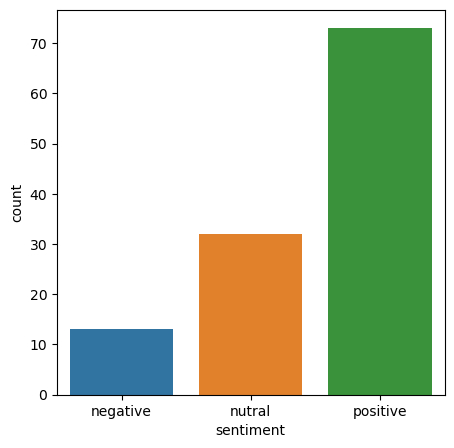

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(5,5))
sns.countplot(x="sentiment",data=review_data2)

Text(0.5, 1.0, 'Distribution Of Sentiments')

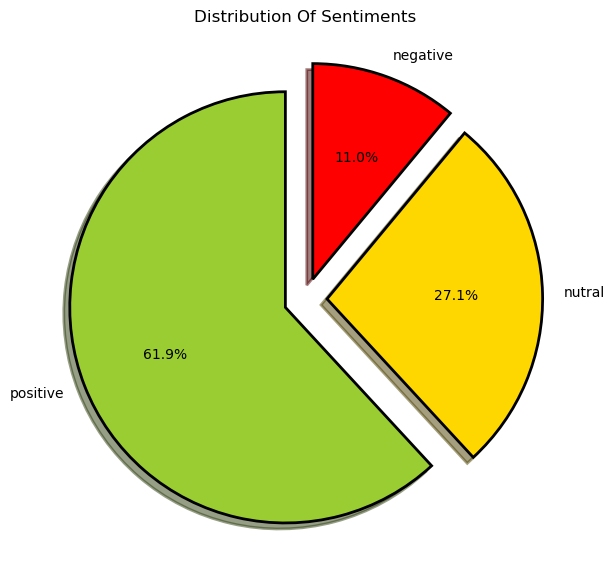

In [176]:
fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={"linewidth":2,"edgecolor":"black"}
tags=review_data2["sentiment"].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title("Distribution Of Sentiments")

In [177]:
review_data2

Review_transform2  \
0                                           shoe feel tight narrow worn purchas return larger size   
1                                                       run big bought recommend half size smaller   
2                                                                                    pleas purchas   
3                                                                                                    
4                                                                         wxoect nice tad bit loos   
..                                                                                             ...   
164                                                bonito ma pouco confortável parec bem resistent   
165  gostei demai produto realment excelent qualidad pelo valor muito confortável bonito vale pena   
166                                                                                            sim   
167                                 não é tão bom quanto pensava pouco mese uso já está desgastado   
168                                 elogio serviu direitinhomuito confortável muito rapido entrega   

     polarity sentiment  
0   -0.126190  negative  
1   -0.055556  negative  
2    0.000000    nutral  
3    0.000000    nutral  
4    0.600000  positive  
..        ...       ...  
164  0.000000    nutral  
165  0.000000    nutral  
166  0.000000    nutral  
167  0.000000    nutral  
168  0.000000    nutral  

[118 rows x 3 columns]

In [178]:
from wordcloud import WordCloud
wc=WordCloud(width=1600,height=500,min_font_size=10,background_color="black")

positive_tweets=wc.generate(review_data2[review_data2['sentiment']=="positive"]["Review_transform2"].str.cat(sep=" "))
positive_tweets

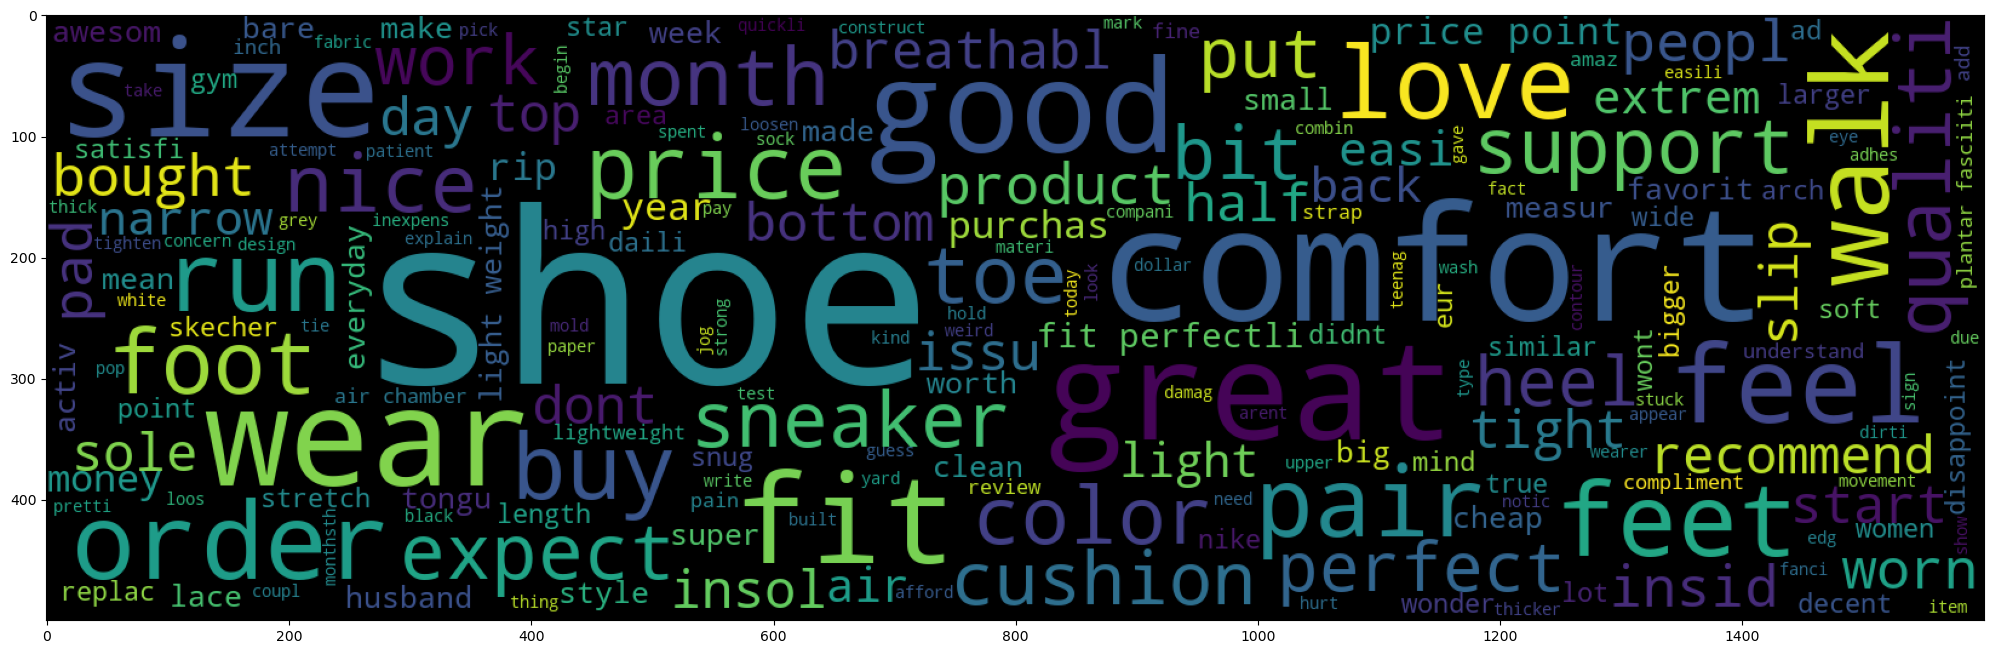

In [179]:
plt.figure(figsize=(25,45))
plt.imshow(positive_tweets)

In [180]:
from wordcloud import WordCloud
wc=WordCloud(width=1600,height=500,min_font_size=10,background_color="white")

negative_tweets=wc.generate(review_data2[review_data2['sentiment']=="negative"]["Review_transform2"].str.cat(sep=" "))
negative_tweets

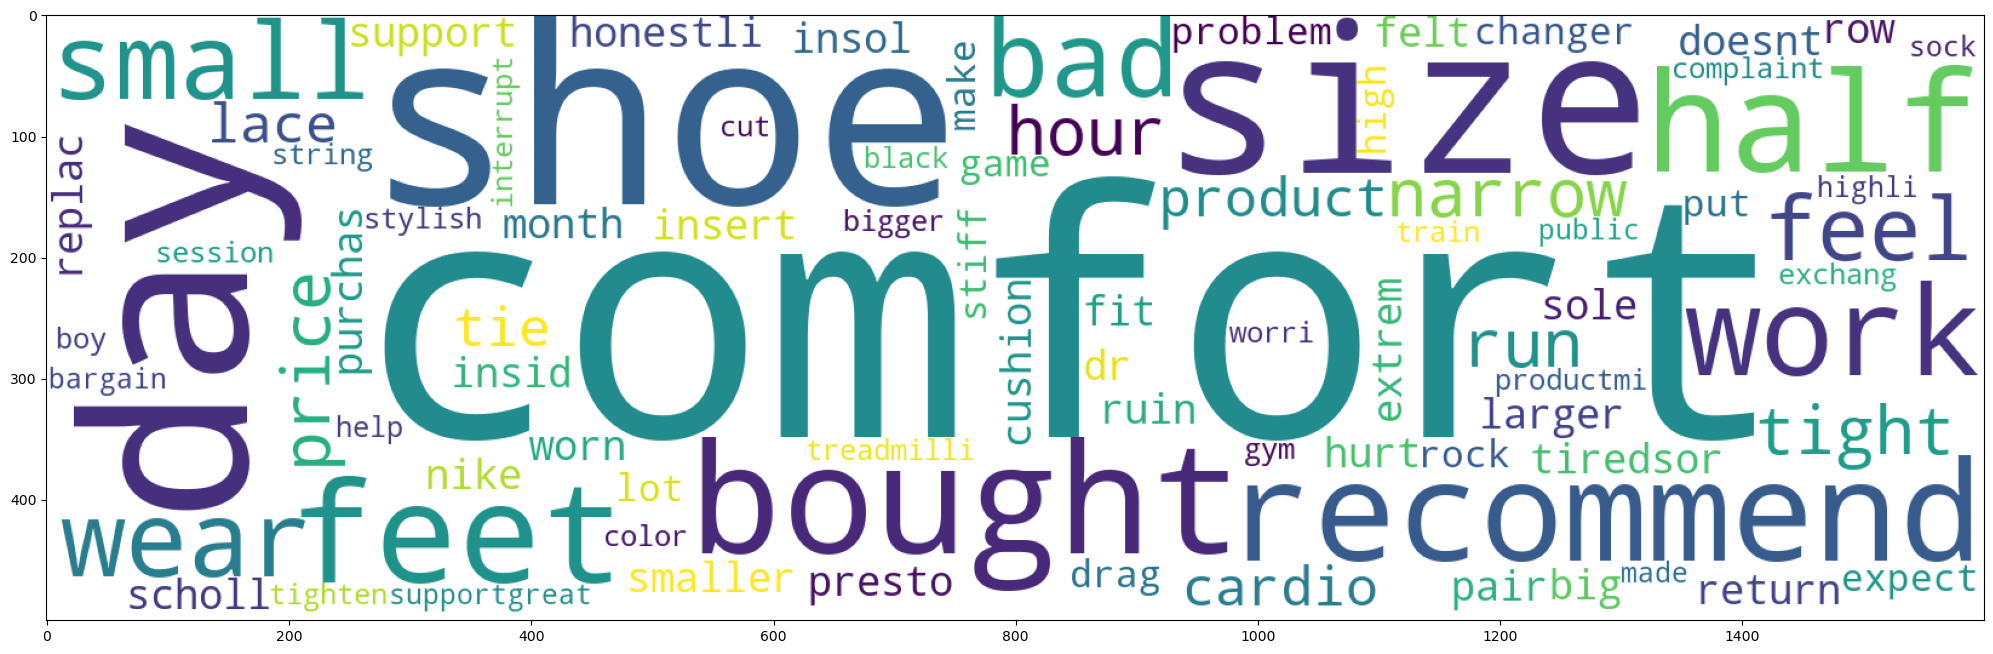

In [181]:
plt.figure(figsize=(25,45))
plt.imshow(negative_tweets)

In [182]:
from wordcloud import WordCloud
wc=WordCloud(width=1600,height=500,min_font_size=10,background_color="white")

nutral_tweets=wc.generate(review_data2[review_data2['sentiment']=="nutral"]["Review_transform2"].str.cat(sep=" "))
nutral_tweets

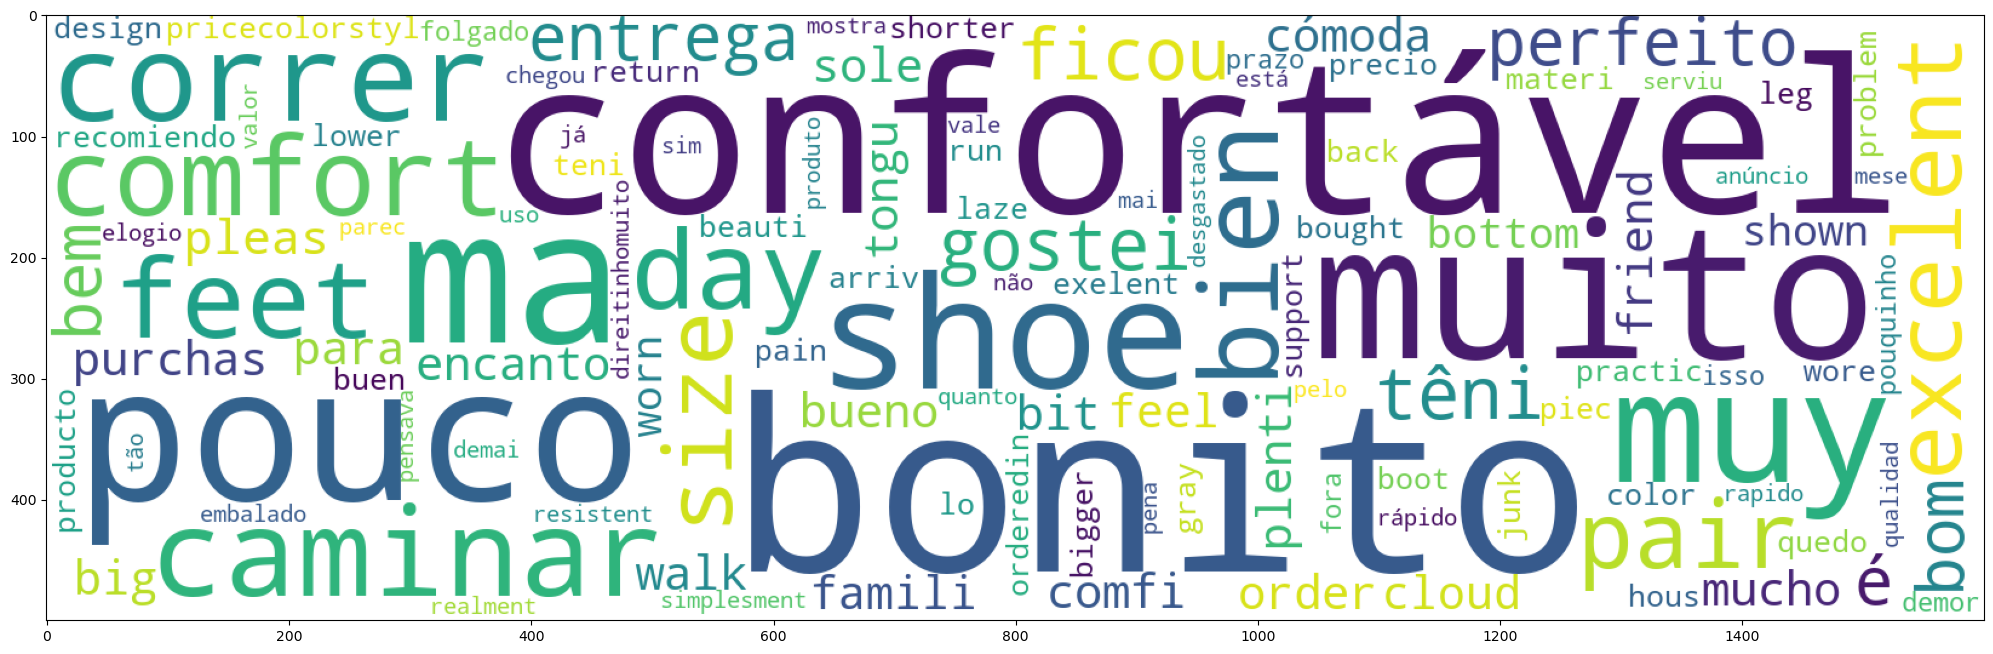

In [184]:
plt.figure(figsize=(25,45))
plt.imshow(nutral_tweets)

In [185]:
## This iS For Positive Tweets...

Po_tweets=[]
for msg in review_data2[review_data2["sentiment"]=="positive"]["Review_transform2"].tolist():
    for word in msg.split():
        Po_tweets.append(word)

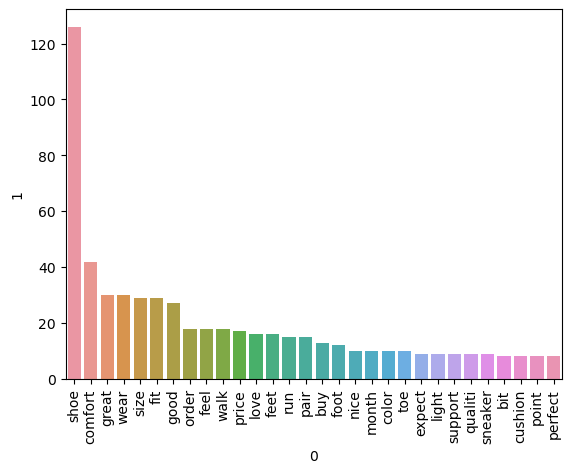

In [186]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Po_tweets).most_common(30))[0],pd.DataFrame(Counter(Po_tweets).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [187]:
## This iS For negative Tweets...
Ne_tweets=[]
for msg in review_data2[review_data2["sentiment"]=="negative"]["Review_transform2"].tolist():
    for word in msg.split():
        Ne_tweets.append(word)

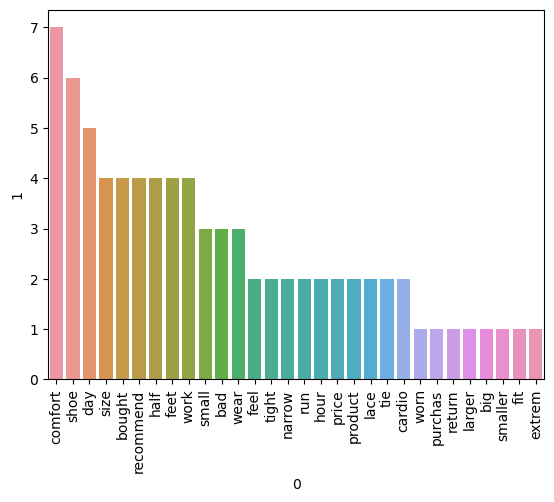

In [188]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Ne_tweets).most_common(30))[0],pd.DataFrame(Counter(Ne_tweets).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [189]:
## This iS For Nutral Tweets Tweets...

Nu_tweets=[]
for msg in review_data2[review_data2["sentiment"]=="nutral"]["Review_transform2"].tolist():
    for word in msg.split():
        Nu_tweets.append(word)

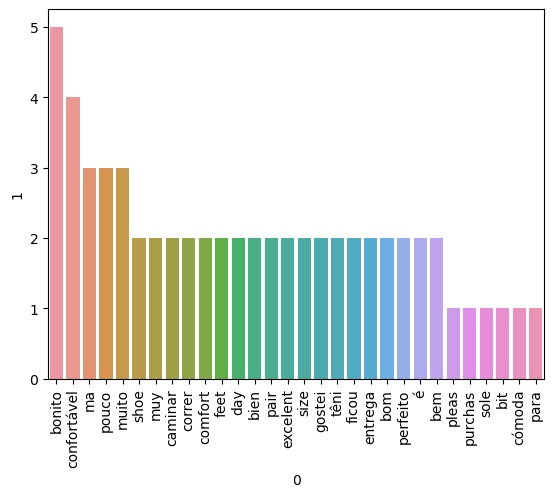

In [190]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Nu_tweets).most_common(30))[0],pd.DataFrame(Counter(Nu_tweets).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

## Model Building

In [191]:
review_data2

Review_transform2  \
0                                           shoe feel tight narrow worn purchas return larger size   
1                                                       run big bought recommend half size smaller   
2                                                                                    pleas purchas   
3                                                                                                    
4                                                                         wxoect nice tad bit loos   
..                                                                                             ...   
164                                                bonito ma pouco confortável parec bem resistent   
165  gostei demai produto realment excelent qualidad pelo valor muito confortável bonito vale pena   
166                                                                                            sim   
167                                 não é tão bom quanto pensava pouco mese uso já está desgastado   
168                                 elogio serviu direitinhomuito confortável muito rapido entrega   

     polarity sentiment  
0   -0.126190  negative  
1   -0.055556  negative  
2    0.000000    nutral  
3    0.000000    nutral  
4    0.600000  positive  
..        ...       ...  
164  0.000000    nutral  
165  0.000000    nutral  
166  0.000000    nutral  
167  0.000000    nutral  
168  0.000000    nutral  

[118 rows x 3 columns]

In [192]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
review_data2["sentiment"]=LE.fit_transform(review_data2["sentiment"])

In [193]:
review_data2

Review_transform2  \
0                                           shoe feel tight narrow worn purchas return larger size   
1                                                       run big bought recommend half size smaller   
2                                                                                    pleas purchas   
3                                                                                                    
4                                                                         wxoect nice tad bit loos   
..                                                                                             ...   
164                                                bonito ma pouco confortável parec bem resistent   
165  gostei demai produto realment excelent qualidad pelo valor muito confortável bonito vale pena   
166                                                                                            sim   
167                                 não é tão bom quanto pensava pouco mese uso já está desgastado   
168                                 elogio serviu direitinhomuito confortável muito rapido entrega   

     polarity  sentiment  
0   -0.126190          0  
1   -0.055556          0  
2    0.000000          1  
3    0.000000          1  
4    0.600000          2  
..        ...        ...  
164  0.000000          1  
165  0.000000          1  
166  0.000000          1  
167  0.000000          1  
168  0.000000          1  

[118 rows x 3 columns]

<AxesSubplot:>

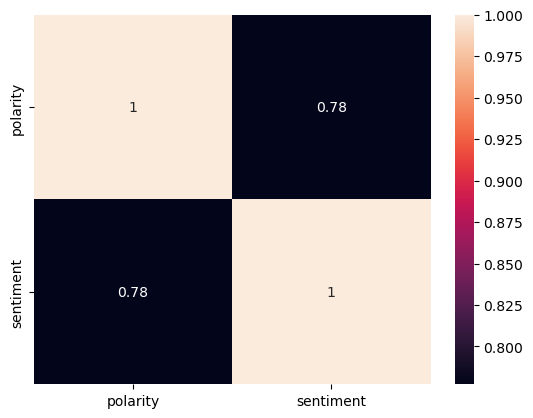

In [194]:
sns.heatmap(review_data2.corr(),annot=True)

In [195]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [196]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(review_data2["Review_transform2"]).toarray() # To Convert Sparce Array To tends Array

In [197]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [198]:
X.shape

(118, 706)

In [199]:
Y=review_data2["sentiment"]

In [200]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [201]:
print("Size of X_train",(X_train.shape))
print("Size of X_test",(X_test.shape))
print("Size of Y_train",(Y_train.shape))
print("Size of Y_test",(Y_test.shape))

Size of X_train (94, 706)
Size of X_test (24, 706)
Size of Y_train (94,)
Size of Y_test (24,)


In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
LR=LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [203]:
Y_pred=LR.predict(X_test)
LR_Accuracy_test=accuracy_score(Y_pred,Y_test)
print("Accuracy Score of Test",LR_Accuracy_test.round(2))

Accuracy Score of Test 0.71


In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [205]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [211]:
clf = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [207]:
def result(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,y_pred)
    return accuracy

In [208]:
result(etc,X_train,Y_train,X_test,Y_test)

0.7916666666666666

In [209]:
accuracy_scores = []

for name,clf in clf.items():
    current_accuracy= result(clf, X_train,Y_train,X_test,Y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    accuracy_scores.append(current_accuracy)

For  SVC
Accuracy -  0.7916666666666666
For  KN
Accuracy -  0.625
For  NB
Accuracy -  0.625
For  DT
Accuracy -  0.8333333333333334
For  LR
Accuracy -  0.7083333333333334
For  RF
Accuracy -  0.75
For  AdaBoost
Accuracy -  0.6666666666666666
For  BgC
Accuracy -  0.7916666666666666
For  ETC
Accuracy -  0.7916666666666666
For  GBDT
Accuracy -  0.8333333333333334
For  xgb
Accuracy -  0.7916666666666666


In [212]:
performance_df=pd.DataFrame({"Algorithem" :clf.keys(),"Accuracy_Score":accuracy_scores})

performance_df

Algorithem  Accuracy_Score
0         SVC        0.791667
1          KN        0.625000
2          NB        0.625000
3          DT        0.833333
4          LR        0.708333
5          RF        0.750000
6    AdaBoost        0.666667
7         BgC        0.791667
8         ETC        0.791667
9        GBDT        0.833333
10        xgb        0.791667

In [213]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithem")
performance_df1

Algorithem        variable     value
0         SVC  Accuracy_Score  0.791667
1          KN  Accuracy_Score  0.625000
2          NB  Accuracy_Score  0.625000
3          DT  Accuracy_Score  0.833333
4          LR  Accuracy_Score  0.708333
5          RF  Accuracy_Score  0.750000
6    AdaBoost  Accuracy_Score  0.666667
7         BgC  Accuracy_Score  0.791667
8         ETC  Accuracy_Score  0.791667
9        GBDT  Accuracy_Score  0.833333
10        xgb  Accuracy_Score  0.791667

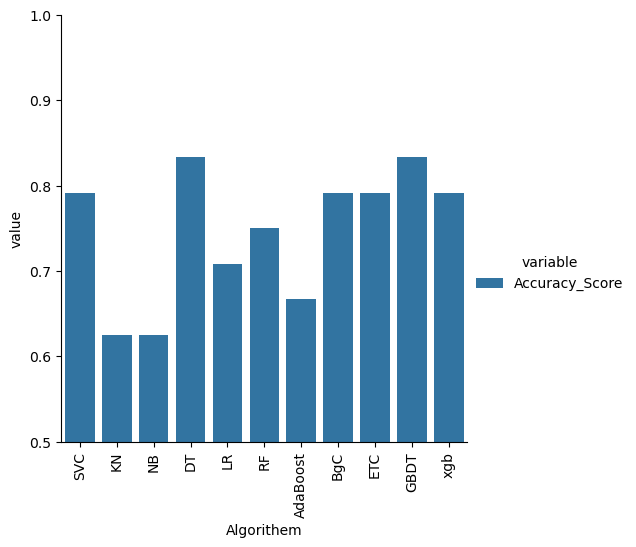

In [216]:

sns.catplot(x = 'Algorithem', y='value', 
                   hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()